In [1]:
#import the necessary packages
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

In [2]:
#import the data
time, y_disp, x_disp = np.loadtxt("Simple Pendulum Data.txt", unpack = True, skiprows = 1)
print('Number of data points =', len(time)) #print the number of data points

Number of data points = 2286


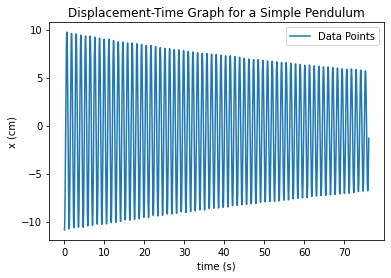

In [3]:
#Visualize the above data
plt.plot(time, x_disp, label = 'Data Points')
plt.xlabel('time (s)')
plt.ylabel('x (cm)')
plt.title('Displacement-Time Graph for a Simple Pendulum')
plt.legend()
plt.show()

In [4]:
#This program will use the curve fitting using Scipy to find the time period
def test_func(t, a, b, c):  #Define the test functions you want to fit
    return a*np.sin(b*t + c)  #a = Amplitude, b = Frequency, c = Phase

Sample_time = time[:150]  #Select the data points before the damping becomes significant
Sample_displacement = x_disp[:150]   

#optimize the parameters a and b in the test function using scipy.optimize.curve_fit
parameters, covariance = optimize.curve_fit(test_func, Sample_time, Sample_displacement, p0 = [10, 5, -np.pi/2])
#It is important to give a good initial starting point

#print the results
print('The best-fit parameters are', r'a=', round(parameters[0],2), r'b=',round(parameters[1],2), r'c=', round(parameters[2],2))

#calculate the points for the best fit curve
Best_fit_curve = [test_func(t, parameters[0], parameters[1], parameters[2]) for t in Sample_time]

The best-fit parameters are a= 10.21 b= 5.38 c= -1.67


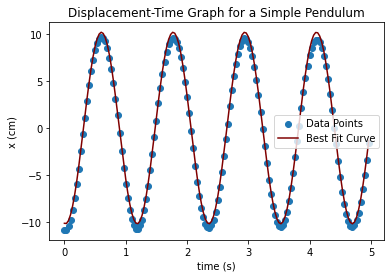

The time period of given oscillation is 1.17 seconds


In [5]:
#Plot the above data and best fit points
plt.scatter(Sample_time, Sample_displacement, label = 'Data Points')
plt.plot(Sample_time, Best_fit_curve, label = 'Best Fit Curve', color = 'maroon')
plt.xlabel('time (s)')
plt.ylabel('x (cm)')
plt.title('Displacement-Time Graph for a Simple Pendulum')
plt.legend()
plt.show()

#Print the time period as 2*pi/omega, omega --> frequency 
print("The time period of given oscillation is", round(2*np.pi/parameters[1],2),'seconds')

In [6]:
#This program will find the maxima points and store them in a list
Maxima_points = []  #Create empty lists to store the maxima points and corresponding time
Time_at_Maxima = []

for i in range(1, len(x_disp)-1):  #for all the elements in the list
    if x_disp[i]- x_disp[i-1] > 0 and x_disp[i+1] - x_disp[i] < 0:  #check the slope on either end of a point
        Maxima_points.append(x_disp[i])  #if it changes from positive to negative, store the displacement and time values
        Time_at_Maxima.append(time[i])

In [7]:
#This program will find the best fit curve for the exponential decay  

#We will plot a best-fit straight line in log(y) vs x graph
Log_maxima_points = np.log(np.array(Maxima_points)) #calculate the log values of the maximum displacement

m, c = np.polyfit(Time_at_Maxima, Log_maxima_points, 1)   #calculate the best fit slope and intercept

#Print the values
print('The best-fit parameters are', r'm=', round(m,2), r'c=', round(c,2))

#Calculate the points in the best fit line
Best_fit_line = [m*t + c for t in Time_at_Maxima]

The best-fit parameters are m= -0.01 c= 2.27


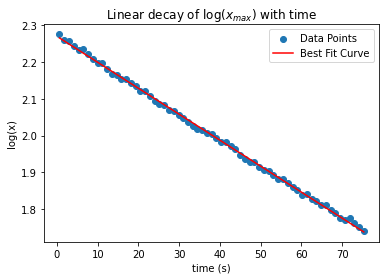

In [8]:
#Plot the above data for linear decay
plt.scatter(Time_at_Maxima, Log_maxima_points, label = 'Data Points')
plt.plot(Time_at_Maxima, Best_fit_line, label = 'Best Fit Curve', color = 'red')
plt.xlabel('time (s)')
plt.ylabel('log(x)')
plt.title(r'Linear decay of $\log(x_{max})$ with time')
plt.legend()
plt.show()

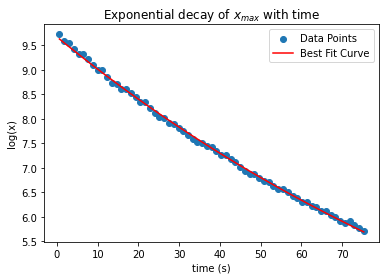

In [9]:
#Plot the exponential decay for better visualization  #x = Aexp(-Bt) --> B = m, A = exp(c)
Exponential_decay = [np.exp(c)*np.exp(m*t) for t in Time_at_Maxima]

#Plot the above data for exponential decay
plt.scatter(Time_at_Maxima, Maxima_points, label = 'Data Points')
plt.plot(Time_at_Maxima, Exponential_decay, label = 'Best Fit Curve', color = 'red')
plt.xlabel('time (s)')
plt.ylabel('log(x)')
plt.title(r'Exponential decay of $x_{max}$ with time')
plt.legend()
plt.show()